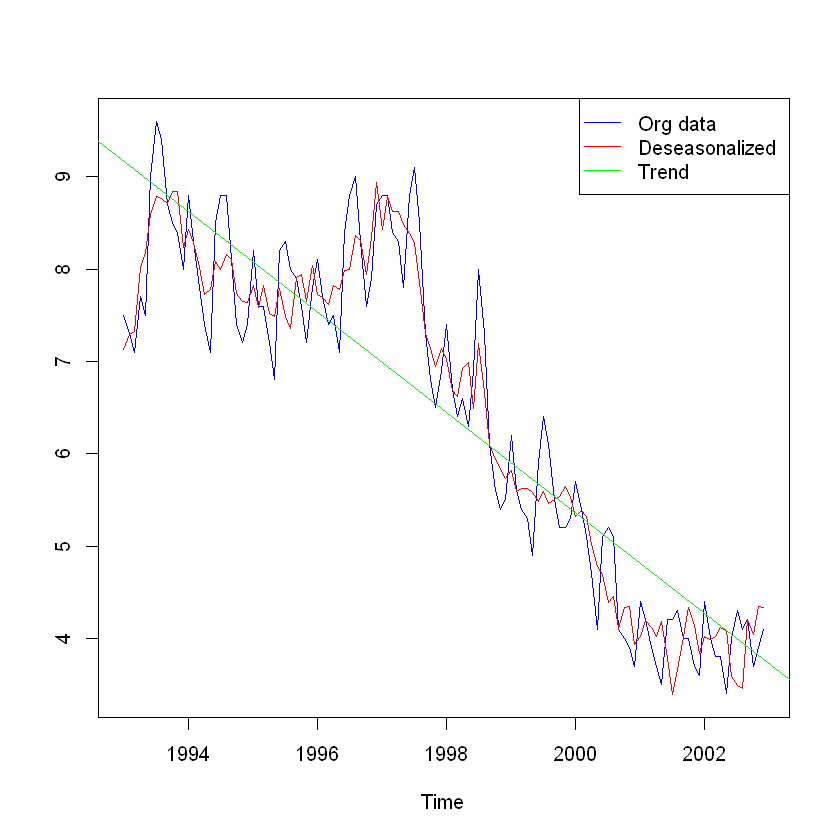

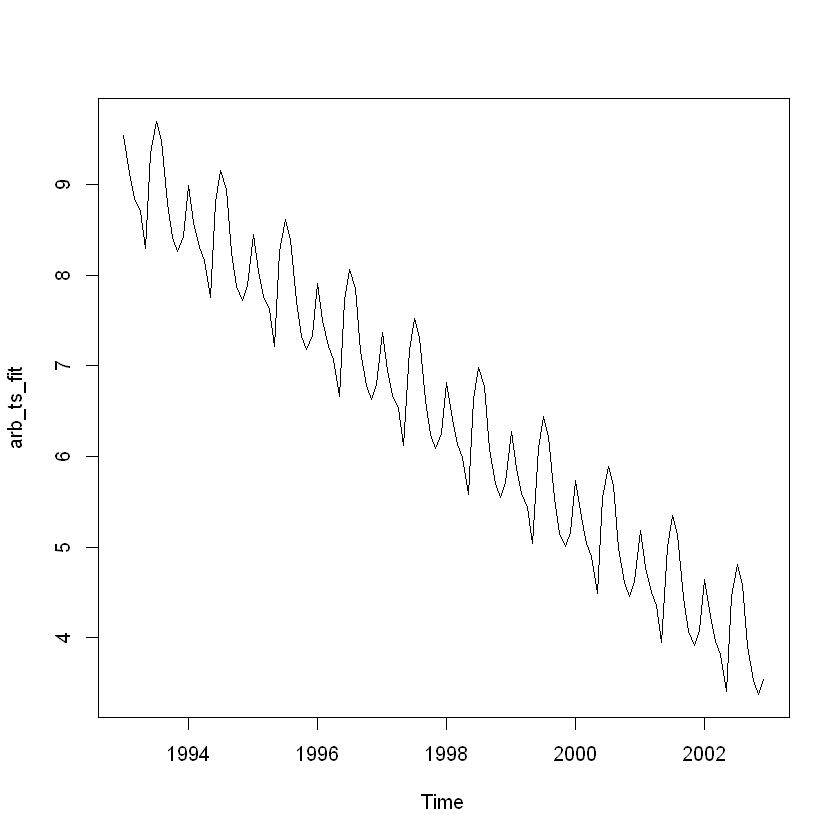

[1] 0.1429185

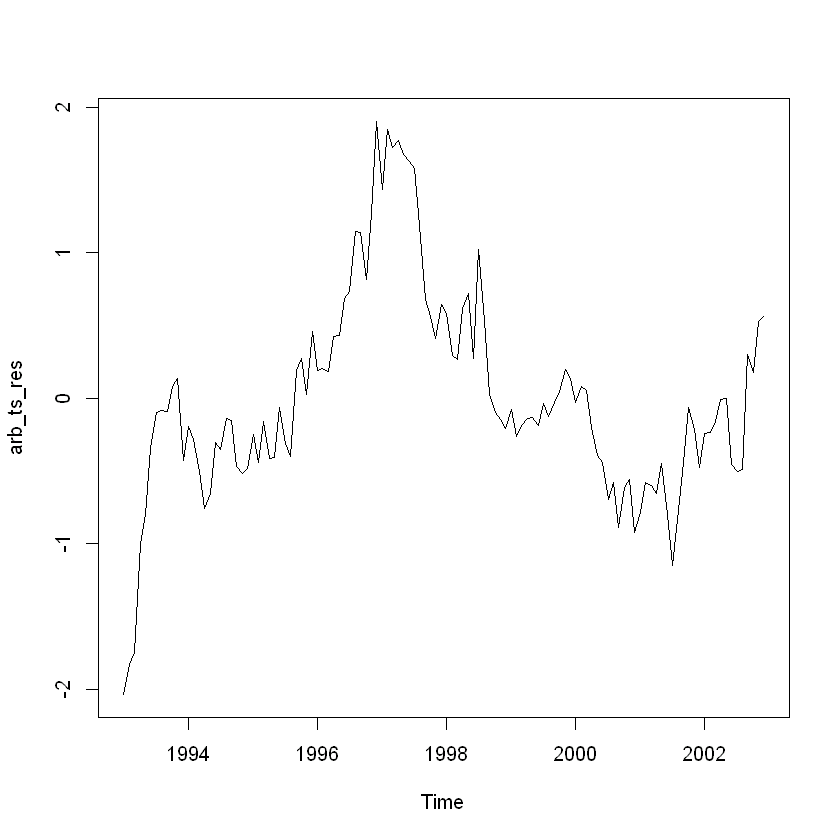

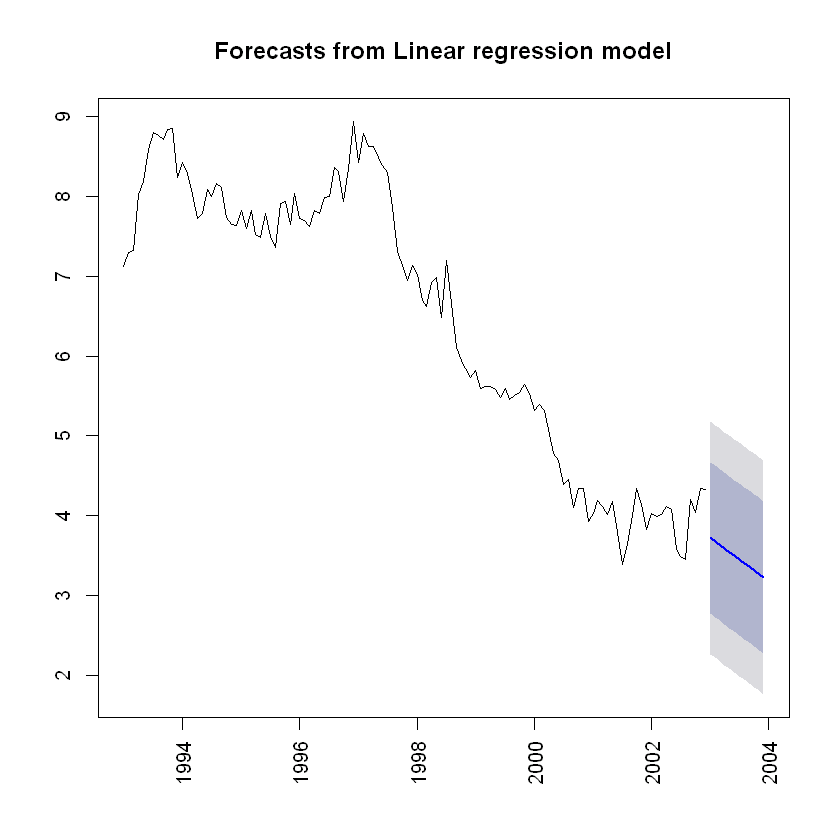

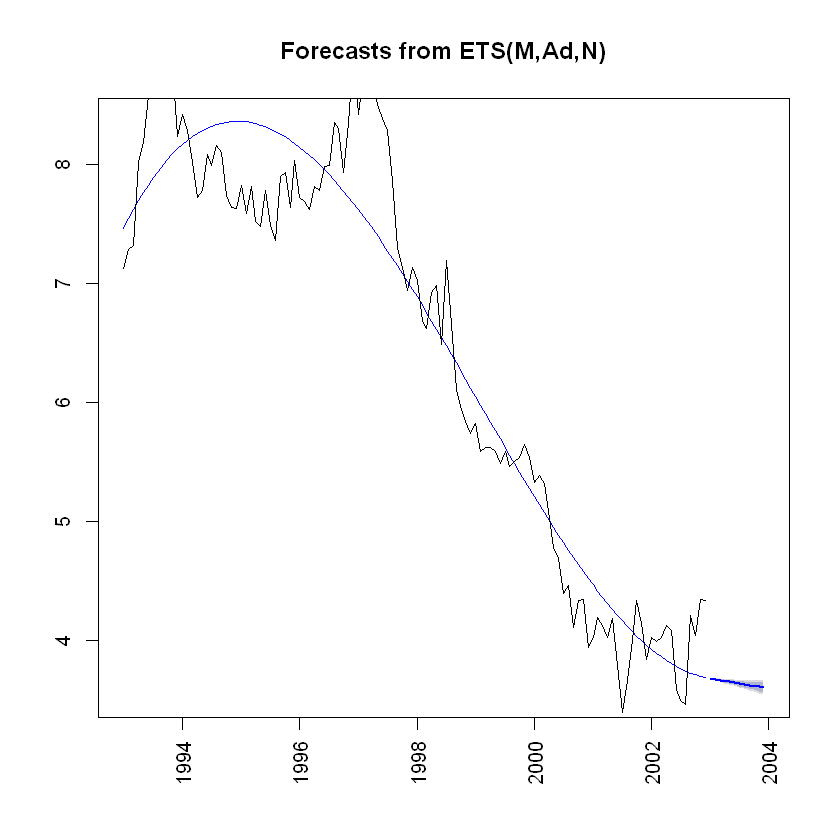

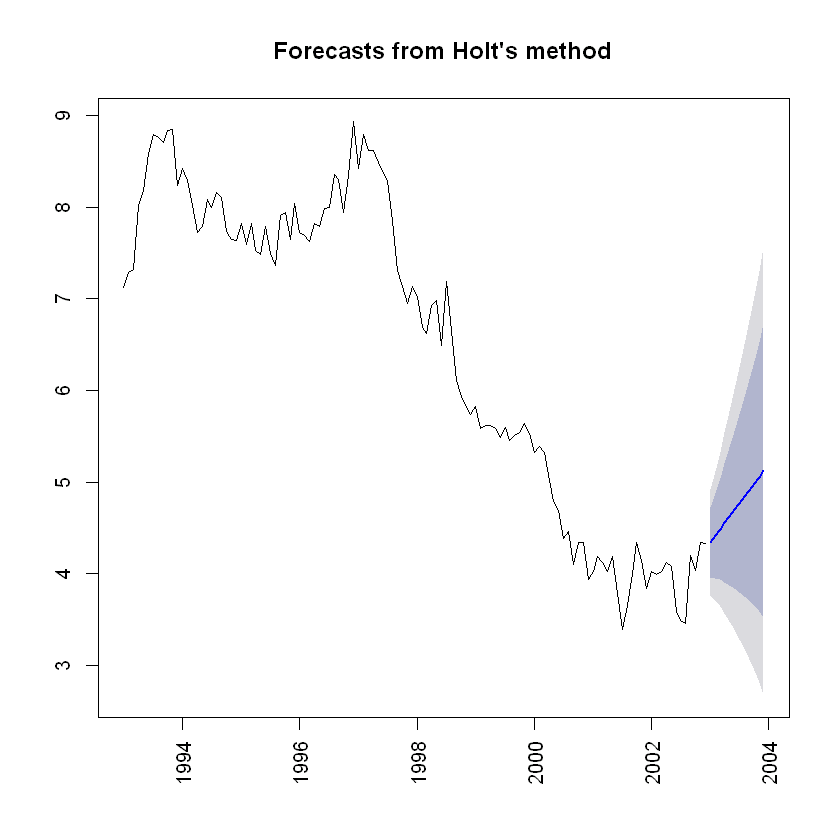

In [49]:
library(forecast)
library(car)
options(scipen=999)

arb_data <- read.csv2("arblosa_87_02.csv")
arb_ts <- ts(arb_data$Part, start=c(1993, 01), end=c(2002, 12), frequency=12)

#THE EASY WAY!!!
#x <- decompose(tt_ts, type = "additive")
#plot(x)

#Calculate moving average
arb_data$Seasonal <- ma(arb_data$Part, 12)
arb_data$Seasonal <- ma(arb_data$Seasonal, 4, centre = TRUE)

#Calculate rough seasonal component
arb_data$Seasonal <- arb_data$Part - arb_data$Seasonal

arb_m_s <- aggregate(arb_data$Seasonal ~ arb_data$Month, FUN = mean)


colnames(arb_m_s) <- c("Month", "Seasonal")

#Plot seasonal components
#plot(ts(rep(t_t_m_s$Seasonal, 11), start=c(1993, 01), end=c(2002, 12), frequency=12))

#Calculate how much bigger or smaller the rough component is
fix_ratio <- sum(arb_m_s$Seasonal) / 12

#Fix the rough seasonal component
arb_m_s$Seasonal <- arb_m_s$Seasonal - fix_ratio
arb_data$Seasonal <- rep(arb_m_s$Seasonal, 10)

arb_data$Deseasonalized <- arb_data$Part - arb_data$Seasonal

arb_dec <- ts(arb_data$Deseasonalized, start=c(1993, 01), end=c(2002, 12), frequency=12)

ts.plot(arb_ts, arb_dec, gpars= list(col = c("blue", "red")))

legend( x="topright", 
        legend=c("Org data","Deseasonalized", "Trend"),
        col=c("blue","red","green"), lwd=1, 
        pch=c(NA,NA))

#Trend
trend <- lm(arb_data$Deseasonalized ~ index(arb_dec))
arb_data$Trend <- trend$fit

abline(trend ,col="green")



arb_data$fit <- arb_data$Trend + arb_data$Seasonal
arb_ts_fit <- ts(arb_data$fit, start=c(1993, 01), end=c(2002, 12), frequency=12)
ts.plot(arb_ts_fit)

residuals <- arb_data$Part - arb_data$fit
arb_ts_res <- ts(residuals, start=c(1993, 01), end=c(2002, 12), frequency=12)

ts.plot(arb_ts_res)
durbinWatsonTest(residuals)


#Predict
arb_ts_pred <- tslm(arb_dec ~ trend)
#summary(arb_ts_pred)
plot(forecast(arb_ts_pred, h=12), xaxt="n")
axis(1, at = c(1994, 1996, 1998, 2000, 2002, 2004), las=2)


#Predict polynomial
arb_ts_pred_pol <- lm(arb_dec ~ poly(1:120, 3, raw=TRUE))
#summary(arb_ts_pred_pol)
arb_ts_pred_pol <- ts(arb_ts_pred_pol$fit, start=c(1993, 01), end=c(2002, 12), frequency=12)
plot(forecast(arb_ts_pred_pol, h=12), xaxt="n", col="blue")
lines(arb_dec, col="black")
axis(1, at = c(1994, 1996, 1998, 2000, 2002, 2004), las=2)


#Predict exponetial smoothing
arb_ts_pred_holt <- holt(arb_dec, alpha=0.5, beta=0.1, h = 12)
#summary(arb_ts_pred_holt)
plot(arb_ts_pred_holt, xaxt="n")
axis(1, at = c(1994, 1996, 1998, 2000, 2002, 2004), las=2)